# Alumno: Gerardo de Miguel González

## OAI-PMH

La documentación del protocolo la podéis encontrar aquí:

https://www.openarchives.org/OAI/openarchivesprotocol.html

## Bibliotecas necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
```

**::GMG::** Como es habitual en mi, exploro caminos *alternativos*. Además de las bibliotecas que se
indican, yo he encontrado las siguientes:

- [lxml](https://lxml.de/) - XML and HTML with Python, "*lxml is the most feature-rich and easy-to-use library for processing XML and HTML in the Python language.*" (sic) y con la que [se puede](https://lxml.de/xpathxslt.html#xpath) usar [XPath](https://devhints.io/xpath)
- Sickle ([PyPi](https://pypi.org/project/Sickle/), [Github](https://github.com/mloesch/sickle), [ReadTheDocs](https://sickle.readthedocs.io/en/latest/), [pdf](https://media.readthedocs.org/pdf/sickle/latest/sickle.pdf))
- PyOAI ([PyPi](https://pypi.org/project/pyoai/), [Github](https://github.com/infrae/pyoai), [HomePage](http://infrae.com/download/OAI/pyoai))

La primera es una alternativa a ET que dicen (ellos, los de lxml) que es mejor :)

> The lxml XML toolkit is a Pythonic binding for the C libraries libxml2 and libxslt. It is unique in that it combines the speed and XML feature completeness of these libraries with the simplicity of a native Python API, mostly compatible but superior to the well-known ElementTree.

**::nota::** Está *instalada* en DataScienceHub, por que la instalé yo (creo, con --user) en otra práctica :)

In [1]:
!pip3 list --user|egrep -i '(lxml)'

lxml         4.2.5      
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


**::GMG::** Las otras dos son bibliotecas específicas para OAI-PMH, que se llaman *harvesters*. Facilitan mucho la vida para trabajar
con registros y colecciones, alejándose del manejo directo de documentos XML.

No están instalados en DataScienceHub pero se pueden instalar :)

```bash
jovyan@cfbf9fe90c2c:~/work/m1968/oaipmh$ pip3 install --user pyoai

Collecting pyoai
  Downloading https://files.pythonhosted.org/packages/21/3c/0ad6e6d50fc355be718fe667541797a27d0252641983b7925df685ef2163/pyoai-2.5.0.tar.gz (106kB)
    100% |████████████████████████████████| 112kB 1.1MB/s
Requirement already satisfied: lxml in /home/jovyan/.local/lib/python3.6/site-packages (from pyoai) (4.2.5)
Requirement already satisfied: six in /opt/conda/lib/python3.6/site-packages (from pyoai) (1.11.0)
Building wheels for collected packages: pyoai
  Running setup.py bdist_wheel for pyoai ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/63/18/82/8019b0aebb613d05a5af7f7ed6276bd2a683333d9b1bbf6af0
Successfully built pyoai
Installing collected packages: pyoai
Successfully installed pyoai-2.5.0

jovyan@cfbf9fe90c2c:~/work/m1968/oaipmh$ pip3 install --user sickle
Collecting sickle
  Downloading https://files.pythonhosted.org/packages/78/73/f6d224de9c336418cc33be7e0101da0fda8f5afe2fb7e459279ba759e61a/Sickle-0.6.4-py3-none-any.whl
Requirement already satisfied: requests>=1.1.0 in /opt/conda/lib/python3.6/site-packages (from sickle) (2.19.1)
Requirement already satisfied: lxml>=3.2.3 in /home/jovyan/.local/lib/python3.6/site-packages (from sickle) (4.2.5)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /opt/conda/lib/python3.6/site-packages (from requests>=1.1.0->sickle) (3.0.4)
Requirement already satisfied: idna<2.8,>=2.5 in /opt/conda/lib/python3.6/site-packages (from requests>=1.1.0->sickle) (2.7)
Requirement already satisfied: urllib3<1.24,>=1.21.1 in /opt/conda/lib/python3.6/site-packages (from requests>=1.1.0->sickle) (1.23)
Requirement already satisfied: certifi>=2017.4.17 in /opt/conda/lib/python3.6/site-packages (from requests>=1.1.0->sickle) (2018.8.13)
Installing collected packages: sickle
Successfully installed sickle-0.6.4
```

In [2]:
!pip3 list --user|egrep -i '(lxml|pyoai|sickle)'

lxml         4.2.5      
pyoai        2.5.0      
Sickle       0.6.4      
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
#::GMG::Importo las bibliotecas "oficiales" para la práctica
import xml.etree.ElementTree as ET
import requests
import json

In [2]:
#::GMG::Importo mis bibliotecas
from lxml import etree
from sickle import Sickle
#::nota::pyOAI
from oaipmh.client import Client
from oaipmh.metadata import MetadataRegistry, oai_dc_reader

## Identify

This verb is used to retrieve information about a repository. Some of the information returned is required as part of the OAI-PMH. Repositories may also employ the Identify verb to return additional descriptive information.

### ElementTree

#### Zenodo, ET

In [5]:
#::GMG::Ejemplo visto en clase con Zenodo
# https://developers.zenodo.org/#oai-pmh
oai = requests.get('https://zenodo.org/oai2d?verb=Identify') #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

#Iterator para recorrer todos los elementos (incluso anidados)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

ParseError: mismatched tag: line 6, column 2 (<string>)

**::GMG::** En el momento de la ejecución al hacer la práctica no me ha funcionado el verbo `Identify`.
Pongo el resultado aquí como noa histórica por si al ejecutarlo de nuevo si funciona:

```Python
Traceback (most recent call last):

  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)

  File "<ipython-input-5-d39f2bd88b84>", line 6, in <module>
    xmlTree = ET.fromstring(oai.text)

  File "/opt/conda/lib/python3.6/xml/etree/ElementTree.py", line 1314, in XML
    parser.feed(text)

  File "<string>", line unknown
ParseError: mismatched tag: line 6, column 2
```

Yo he probado hacer la petición 

```url
https://zenodo.org/oai2d?verb=Identify
```

con el cliente API RESTED de firefox y el servidor de Zenodo me ha dado la
siguiente respuesta:

```html
<html>
<head><title>504 Gateway Time-out</title></head>
<body bgcolor="white">
<center><h1>504 Gateway Time-out</h1></center>
<hr><center>nginx/1.12.2</center>
</body>
</html>
```

In [7]:
#::GMG::Se puede ver más claro si se trata con excepciones
# https://stackoverflow.com/questions/16511337/correct-way-to-try-except-using-python-requests-module
try:
    oai = requests.get('https://zenodo.org/oai2d?verb=Identify') #Peticion al servidor
    oai.raise_for_status()
except requests.exceptions.HTTPError as err:
    print (err)

504 Server Error: Gateway Time-out for url: https://zenodo.org/oai2d?verb=Identify


**::GMG::** A mi me sale

```shell
504 Server Error: Gateway Time-out for url: https://zenodo.org/oai2d?verb=Identify
```

#### Figshare, ET, lxml

In [8]:
#::GMG::Puesto que al final lo que quiero es ver un ejemplo voy a usar el verbo en otro 
#       repositorio de los que hemos visto en la asignatura
# https://docs.figshare.com/old_docs/OAI-PMH/
try:
    oai = requests.get('https://api.figshare.com/v2/oai?verb=Identify') #Peticion al servidor
    oai.raise_for_status()
    #Para crear el arbol XML
    xmlTree = ET.fromstring(oai.text)
    #Iterator para recorrer todos los elementos (incluso anidados)
    iterator = xmlTree.iter()
    for elem in iterator:
        print(elem.tag + ': ' + elem.text)
except requests.exceptions.HTTPError as err:
    print (err)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-01-04T13:44:00Z
{http://www.openarchives.org/OAI/2.0/}request: https://api.figshare.com/v2/oai
{http://www.openarchives.org/OAI/2.0/}Identify: 
    
{http://www.openarchives.org/OAI/2.0/}repositoryName: figshare
{http://www.openarchives.org/OAI/2.0/}baseURL: https://api.figshare.com/v2/oai
{http://www.openarchives.org/OAI/2.0/}protocolVersion: 2.0
{http://www.openarchives.org/OAI/2.0/}adminEmail: info@figshare.com
{http://www.openarchives.org/OAI/2.0/}earliestDatestamp: 1912-06-06T00:00:00Z
{http://www.openarchives.org/OAI/2.0/}deletedRecord: transient
{http://www.openarchives.org/OAI/2.0/}granularity: YYYY-MM-DDThh:mm:ssZ


In [17]:
#::GMG::Y voy a buscar el elemento específico, en este caso la baseURL
# Findall para encontrar un elemento específico
#::nota::recuerda los namespaces ...
# https://stackoverflow.com/questions/14853243/parsing-xml-with-namespace-in-python-via-elementtree
namespaces = {'oai-pmh': 'http://www.openarchives.org/OAI/2.0/'}
elemento = xmlTree.find('.//oai-pmh:baseURL', namespaces)
print("BaseURL:", elemento.text)

BaseURL: https://api.figshare.com/v2/oai


In [14]:
#::GMG::Puede ser intersante ver el documento XML devuelto
#::nota::esto ES feo (not pretty) :)
oai.text

'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<?xml-stylesheet type="text/xsl" href="/v2/static/oai2.xsl"?>\n<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">\n  <responseDate>2019-01-04T13:44:00Z</responseDate>\n  <request verb="Identify">https://api.figshare.com/v2/oai</request>\n  <Identify>\n    <repositoryName>figshare</repositoryName>\n    <baseURL>https://api.figshare.com/v2/oai</baseURL>\n    <protocolVersion>2.0</protocolVersion>\n    <adminEmail>info@figshare.com</adminEmail>\n    <earliestDatestamp>1912-06-06T00:00:00Z</earliestDatestamp>\n    <deletedRecord>transient</deletedRecord>\n    <granularity>YYYY-MM-DDThh:mm:ssZ</granularity>\n  </Identify>\n</OAI-PMH>\n'

In [15]:
#::GMG::uso lxml.etree.fromstring() y NO hay que usar oai.text sino oai.content :)
#::nota::con eso "pierdo" la parte de definición del documento <?xml?> ... todavía no sé cómo
#        obtenerlo entero (!!)
# https://stackoverflow.com/questions/749796/pretty-printing-xml-in-python
# https://lxml.de/parsing.html
# https://stackoverflow.com/questions/32058549/ioerror-passing-requests-response-content-to-lxml-etree-parse
# https://stackoverflow.com/questions/28534460/lxml-etree-xml-valueerror-for-unicode-string
# https://stackoverflow.com/questions/40447117/parsing-xml-and-html-page-with-lxml-and-requests-package-in-python
# https://github.com/mloesch/sickle/issues/20
x = etree.fromstring(oai.content)
print (etree.tostring(x, pretty_print=True, encoding="unicode"))

<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2019-01-04T13:44:00Z</responseDate>
  <request verb="Identify">https://api.figshare.com/v2/oai</request>
  <Identify>
    <repositoryName>figshare</repositoryName>
    <baseURL>https://api.figshare.com/v2/oai</baseURL>
    <protocolVersion>2.0</protocolVersion>
    <adminEmail>info@figshare.com</adminEmail>
    <earliestDatestamp>1912-06-06T00:00:00Z</earliestDatestamp>
    <deletedRecord>transient</deletedRecord>
    <granularity>YYYY-MM-DDThh:mm:ssZ</granularity>
  </Identify>
</OAI-PMH>



In [36]:
#::GMG::Ya que estamos con lxml también puedo encontrar los elementos que quiero
# https://stackoverflow.com/questions/18264689/most-efficient-way-of-extracting-data-from-xml-using-lxml
#::nota::puedo usar find() y findall() como en ET pero también directamente xpath() con mamespaces
[''.join('Granularity: ' + e.text) for e in x.xpath('//oai-pmh:granularity',namespaces = namespaces)]

['Granularity: YYYY-MM-DDThh:mm:ssZ']

#### ArXiv, lxml

**::GMG::** Como Bonus voy a usar otro repositorio muy conocido llamado [ArXiv](https://arxiv.org/) que también tiene [un interfaz OAI](https://arxiv.org/help/oa/index)

In [39]:
#::GMG::La respuesta es MUCHO más extensa que la de figshare e incluye dos descripciones
#       con etiquetas/vocabulario 'eprints' y 'branding'
try:
    oai = requests.get('https://export.arxiv.org/oai2?verb=Identify')
    oai.raise_for_status()
    x = etree.fromstring(oai.content)
    print (etree.tostring(x, pretty_print=True, encoding="unicode"))
except requests.exceptions.HTTPError as err:
    print (err)

<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
<responseDate>2019-01-04T15:19:55Z</responseDate>
<request verb="Identify">http://export.arxiv.org/oai2</request>
<Identify>
<repositoryName>arXiv</repositoryName>
<baseURL>http://export.arxiv.org/oai2</baseURL>
<protocolVersion>2.0</protocolVersion>
<adminEmail>help@arxiv.org</adminEmail>
<earliestDatestamp>2007-05-23</earliestDatestamp>
<deletedRecord>persistent</deletedRecord>
<granularity>YYYY-MM-DD</granularity>
<description>
<eprints xmlns="http://www.openarchives.org/OAI/1.1/eprints" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/1.1/eprints http://www.openarchives.org/OAI/1.1/eprints.xsd">
 <content>
  <text>Author self-archived e-prints</text>
 </content>
 <metadataPolicy>
  <text>Metadata harvesting permitt

In [41]:
#::GMG::La iteración recursiva por las etiquetas en lxml es como en ET
for e in x.iter():
    print(e.tag + ': ' + e.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 

{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-01-04T15:19:55Z
{http://www.openarchives.org/OAI/2.0/}request: http://export.arxiv.org/oai2
{http://www.openarchives.org/OAI/2.0/}Identify: 

{http://www.openarchives.org/OAI/2.0/}repositoryName: arXiv
{http://www.openarchives.org/OAI/2.0/}baseURL: http://export.arxiv.org/oai2
{http://www.openarchives.org/OAI/2.0/}protocolVersion: 2.0
{http://www.openarchives.org/OAI/2.0/}adminEmail: help@arxiv.org
{http://www.openarchives.org/OAI/2.0/}earliestDatestamp: 2007-05-23
{http://www.openarchives.org/OAI/2.0/}deletedRecord: persistent
{http://www.openarchives.org/OAI/2.0/}granularity: YYYY-MM-DD
{http://www.openarchives.org/OAI/2.0/}description: 

{http://www.openarchives.org/OAI/1.1/eprints}eprints: 
 
{http://www.openarchives.org/OAI/1.1/eprints}content: 
  
{http://www.openarchives.org/OAI/1.1/eprints}text: Author self-archived e-prints
{http://www.openarchives.org/OAI/1.1/eprints}meta

In [149]:
#::GMG::Si quiero ver la parte de los eprints
namespaces = {'oai-pmh': 'http://www.openarchives.org/OAI/2.0/',
              'oai-eprints': 'http://www.openarchives.org/OAI/1.1/eprints',
              'oai-branding': 'http://www.openarchives.org/OAI/2.0/branding/'}
#::GMG::Saco las primera descripción (que contiene eprints)
description = x.xpath('//oai-pmh:description[1]',namespaces = namespaces)
#::GMG::Saco el elemento eprints dentro de la descripción
eprints = description[0].xpath('//oai-eprints:eprints/*', namespaces = namespaces)
#print(eprints)
for e in eprints:
    print('Node:', e.tag.replace(
      '{' + namespaces['oai-eprints'] + '}', 
      str(list(namespaces.keys())[1]) + ':'
      ))
    for t in e.iter():
        if len(t) == 0: 
            print('Tag: {} --> {}'.format(
                    t.tag.replace('{' + namespaces['oai-eprints'] + '}', 
      str(list(namespaces.keys())[1]) + ':'), 
                    t.text)
                 )

Node: oai-eprints:content
Tag: oai-eprints:text --> Author self-archived e-prints
Node: oai-eprints:metadataPolicy
Tag: oai-eprints:text --> Metadata harvesting permitted through OAI interface
Tag: oai-eprints:URL --> http://arxiv.org/help/oa/metadataPolicy
Node: oai-eprints:dataPolicy
Tag: oai-eprints:text --> Full-content harvesting not permitted (except by special arrangement)
Tag: oai-eprints:URL --> http://arxiv.org/help/oa/dataPolicy
Node: oai-eprints:submissionPolicy
Tag: oai-eprints:text --> Author self-submission preferred, submissions screened for appropriateness.
Tag: oai-eprints:URL --> http://arxiv.org/help/submit


## Listar tipos de metadatos

### ListMetadataFormats

This verb is used to retrieve the metadata formats available from a repository. An optional argument restricts the request to the formats available for a specific item.

In [150]:
#::GMG::Parece que el error de zenodo solamente se limitaba a Identify ... (?)
oai = requests.get('https://zenodo.org/oai2d?verb=ListMetadataFormats') #Peticion al servidor

#Para crear el arbol XML
xmlTree = ET.fromstring(oai.text)

iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-01-04T17:38:48Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListMetadataFormats: 
    
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://www.loc.gov/MARC21/slim
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataNamespace: http://www.openarchives.org/OAI/2.0/oai_dc/
{http://www.openarchives.org/OAI/2.0/}metadataFormat: 
      
{http://www.openarchives.org/OAI/2.0/}metad

Podemos capturar sólo la información relevante

In [152]:
#::GMG::Hay que hacer notar que un iterador de Python es un objeto de "un solo uso" y si se quiere
#       iterar hay que crear de nuevo el objeto (!!)
iterator = xmlTree.iter()
for elem in iterator:
    if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix') or 
       (elem.tag == '{http://www.openarchives.org/OAI/2.0/}schema'):
        print(elem.tag+": "+elem.text)

{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marcxml
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_dc
{http://www.openarchives.org/OAI/2.0/}schema: http://www.openarchives.org/OAI/2.0/oai_dc.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: oai_datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-3/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: marc21
{http://www.openarchives.org/OAI/2.0/}schema: http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: datacite
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
{http://www.openarchives.org/OAI/2.0/}metadataPrefix: datacite3
{http://www.openarchives.org/OAI/2.0/}schema: http://schema.datacite.org/meta/kernel-3/metadata.xsd
{http://www.opena

O de forma más "elegante"

In [154]:
#::GMG::aquí aporto el uso de namespaces que es más "elegante" :)
for e in xmlTree.findall('.//oai-pmh:metadataFormat', namespaces = namespaces):
    metadataPrefix = e.find('oai-pmh:metadataPrefix', namespaces = namespaces).text
    schema = e.find('oai-pmh:schema',namespaces = namespaces).text
    print(metadataPrefix, ':', schema)

marcxml : http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
oai_dc : http://www.openarchives.org/OAI/2.0/oai_dc.xsd
oai_datacite : http://schema.datacite.org/meta/kernel-3/metadata.xsd
marc21 : http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd
datacite : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
datacite3 : http://schema.datacite.org/meta/kernel-3/metadata.xsd
datacite4 : http://schema.datacite.org/meta/kernel-4.1/metadata.xsd
oai_datacite3 : http://schema.datacite.org/meta/kernel-3/metadata.xsd


Podemos describir el último schema

In [160]:
#::GMG::Sin comentarios :)
#::nota::es una salida muy grande y decido no incluirla en el notebook
oai_datacite = requests.get('http://schema.datacite.org/meta/kernel-3/metadata.xsd') #Peticion al servidor
#print(oai_datacite.text)

In [161]:
#::GMG::Vale, creo que lo entiendo ... se crea un árbol XML a partir del documento
# Para crear el arbol XML
xmlTree = ET.fromstring(oai_datacite.text)
#::nota::es una salida muy grande y decido NO incluirla en el notebook
#iterator = xmlTree.iter()
#for elem in iterator:
#    print(elem.tag)
#::nota::de la salida no queda muy claro DÓNDE están definidas esas etiquetas que se comentan a continuación
#        La única manera de verlas que me ha convencido es directamente con el firefox

**::GMG::** La manera de verlo más claro en mi opinión es abrir la URL en un firefox y navegar por
el documento. Hay que entender un poco como es XSL, claro.

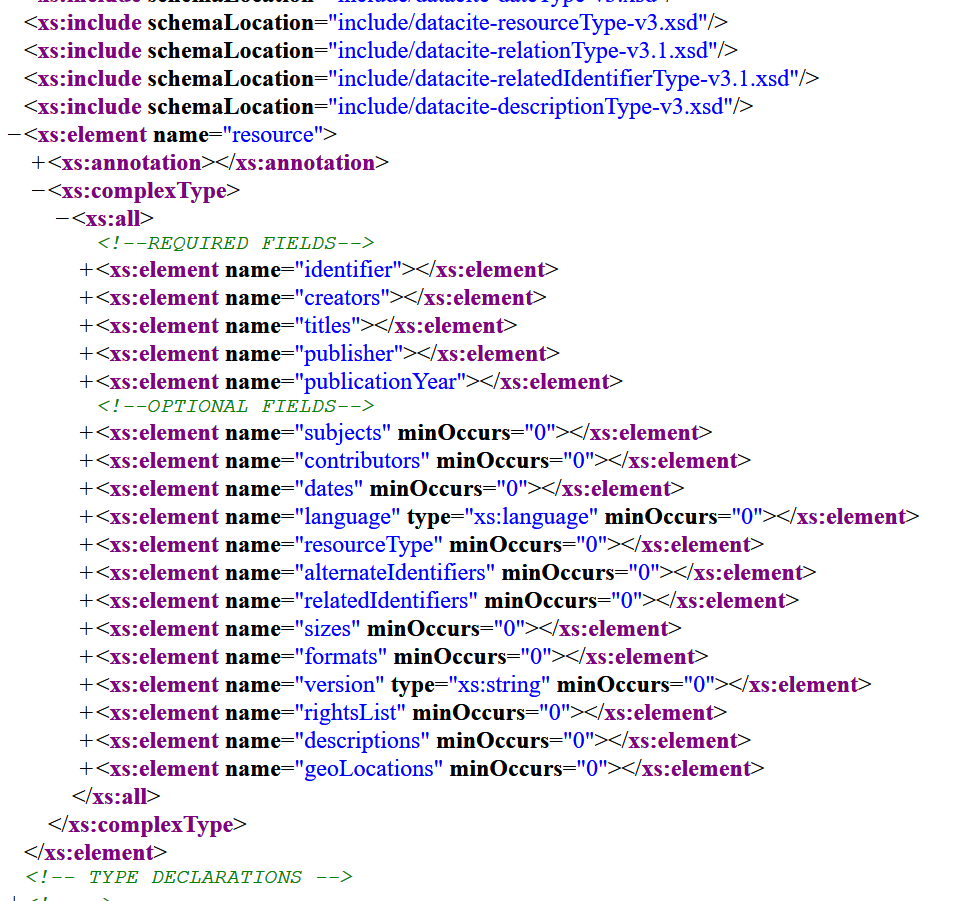

Si analizamos la descripción del estándar, vemos que las etiquetas de los metadatos están almacenados en la etiqueta "element", en el atributo "name". Podemos obetener un listado de lo que esperamos encontrar

In [163]:
#::GMG::Cambio el nombre del objeto namespaces --> ns para no confundir con el que yo he creado
#       También he hecho una pequeña modificación basada en la imagen que he capturado e insertado
#       arriba en la que he visto que se pueden distinguir los campos obligatorios de los opcionales
#       por la existencia del atributo "minOccurs"
#::nota::el número de elementos que aparecen es mayor que el que yo he capturado en la imagen porque los
#        xs:element son "compuestos" de otros tipos de datos (!!)
ns = {'xs' : 'http://www.w3.org/2001/XMLSchema'}
for tags in xmlTree.findall('.//xs:element',ns):
    if 'minOccurs' not in tags.attrib:
        print ('Metadato Obligatorio: ',tags.attrib['name'])
    else:
        print ('Metadato Opcional: ',tags.attrib['name'])

Metadato Obligatorio:  resource
Metadato Obligatorio:  identifier
Metadato Obligatorio:  creators
Metadato Obligatorio:  creator
Metadato Obligatorio:  creatorName
Metadato Opcional:  nameIdentifier
Metadato Opcional:  affiliation
Metadato Obligatorio:  titles
Metadato Obligatorio:  title
Metadato Obligatorio:  publisher
Metadato Obligatorio:  publicationYear
Metadato Opcional:  subjects
Metadato Opcional:  subject
Metadato Opcional:  contributors
Metadato Opcional:  contributor
Metadato Obligatorio:  contributorName
Metadato Opcional:  nameIdentifier
Metadato Opcional:  affiliation
Metadato Opcional:  dates
Metadato Opcional:  date
Metadato Opcional:  language
Metadato Opcional:  resourceType
Metadato Opcional:  alternateIdentifiers
Metadato Opcional:  alternateIdentifier
Metadato Opcional:  relatedIdentifiers
Metadato Opcional:  relatedIdentifier
Metadato Opcional:  sizes
Metadato Opcional:  size
Metadato Opcional:  formats
Metadato Opcional:  format
Metadato Opcional:  version
Metad

## Listar identificadores

### ListIdentifiers

This verb is an abbreviated form of ListRecords, retrieving only headers rather than records. Optional arguments permit selective harvesting of headers based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted.

Devuelve la cabecera de los registros, para conocer la información esencial.

Necesita el prefijo del formato de metadatos

**::GMG::** Si no se limita la búsqueda salen TODAS las cabeceras de los items disponibles (donde se puede ver el *identificador* que usa Zenodo para sus items, por ejemplo, `oai:zenodo.org:967068` ...

```http

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-01-04T18:56:17Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListIdentifiers: 
    
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:967068
{http://www.openarchives.org/OAI/2.0/}datestamp: 2017-09-25T15:42:06Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit

[...]

{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:959605
{http://www.openarchives.org/OAI/2.0/}datestamp: 2017-09-25T15:30:32Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:960597
{http://www.openarchives.org/OAI/2.0/}datestamp: 2017-09-25T15:31:09Z
{http://www.openarchives.org/OAI/2.0/}setSpec: user-biosyslit

{http://www.openarchives.org/OAI/2.0/}resumptionToken: .eJwVzkFvgjAYgOH_8p2JKVUs48Yiziy2bCAVvJgKHaEUIbQLovG_z13f5_I-wEhZQYAWyMNovfR9QjBa-es33wFTjr3W5-blUOZcl1ediQ_-m3QcFbgmVBlMVTQzFU7xIcNxa-xlw-Z0l6wyzm3uDpYe2HzqvG2KIsJU5DL1faeqwGzTe_EunPb5EKVucizyE5WtuV309rM68vf4HhJwYBC1hAA70E5irA0ED-ikFZWw4muUP83ttdaL5vwfysZKeD7_AFe3RKw.DxE90g.q8-BaOtKIVNV4vHt_efNqaaB2WA
```

hasta un límite en el que se pone un `resumptionToken` que se puede usar dentro de un periodo (creo que de dos minutos en Zenodo) para hacer otra petición de los siguientes de la lista. Esto pasa en todos los verbos `ListX` según tengo entendido. Este token hay que meterlo en la cabecera de las peticiones siguientes. Si se sobrepasa el tiempo en el que es válido el token, aunque se use, el servidor devuelve un error.

In [185]:
#::GMG::Yo he limiado la búsqueda por set y fecha para que la respuesta en el notebook sea limitada (sin token)
#::nota::las cabeceras que devuelve NO están ordenadas por fechas
try:
    oai = requests.get(
    'https://zenodo.org/oai2d?verb=ListIdentifiers&metadataPrefix=oai_datacite' + 
    '&from=2019-01-04T19:10:22Z&until=2019-01-04T19:14:51Z&set=software'
    )
    xmlTree = ET.fromstring(oai.text)
    #print(oai.text)
    iterator = xmlTree.iter()
    for elem in iterator:
        print(elem.tag +  ': ' + elem.text)
except requests.exceptions.HTTPError as err:
    print (err)


{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-01-04T19:47:32Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListIdentifiers: 
    
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:55146
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-01-04T19:14:44Z
{http://www.openarchives.org/OAI/2.0/}setSpec: software
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:55363
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-01-04T19:14:45Z
{http://www.openarchives.org/OAI/2.0/}setSpec: software
{http://www.openarchives.org/OAI/2.0/}header: 
      
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:57427
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-01-04T19:14:47Z
{http://www.openarchives.org/OAI/2.0/}setSpec:

## Listar los registros

### ListRecords

This verb is used to harvest records from a repository. Optional arguments permit selective harvesting of records based on set membership and/or datestamp. Depending on the repository's support for deletions, a returned header may have a status attribute of "deleted" if a record matching the arguments specified in the request has been deleted. No metadata will be present for records with deleted status.

**::GMG::** Por alguna razón, el código siguiente da un error:

```Python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-188-1f4df5966462> in <module>
     10     iterator = xmlTree.iter()
     11     for elem in iterator:
---> 12         print(elem.tag +  ': ' + elem.text)
     13 except requests.exceptions.HTTPError as err:
     14     print (err)

TypeError: must be str, not NoneType
```

In [188]:
#::GMG::Uso la misma una limitación todavía mayor que en el caso anterior porque ahora no solamente se lista la
#       cabecera sino también el metadata (!)
#::nota::Por alguna razón que no alcanzo a ver da UN ERROR
try:
    oai = requests.get(
    'https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=oai_datacite' + 
    '&from=2019-01-04T19:14:50Z&until=2019-01-04T19:14:51Z&set=software'
    )
    xmlTree = ET.fromstring(oai.text)
    #print(oai.text)
    iterator = xmlTree.iter()
    for elem in iterator:
        print(elem.tag +  ': ' + elem.text)
except requests.exceptions.HTTPError as err:
    print (err)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH: 
  
{http://www.openarchives.org/OAI/2.0/}responseDate: 2019-01-04T20:00:50Z
{http://www.openarchives.org/OAI/2.0/}request: https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords: 
    
{http://www.openarchives.org/OAI/2.0/}record: 
      
{http://www.openarchives.org/OAI/2.0/}header: 
        
{http://www.openarchives.org/OAI/2.0/}identifier: oai:zenodo.org:62066
{http://www.openarchives.org/OAI/2.0/}datestamp: 2019-01-04T19:14:50Z
{http://www.openarchives.org/OAI/2.0/}setSpec: software
{http://www.openarchives.org/OAI/2.0/}metadata: 
        
{http://schema.datacite.org/oai/oai-1.0/}oai_datacite: 
          
{http://schema.datacite.org/oai/oai-1.0/}isReferenceQuality: true
{http://schema.datacite.org/oai/oai-1.0/}schemaVersion: 3.1
{http://schema.datacite.org/oai/oai-1.0/}datacentreSymbol: CERN.ZENODO
{http://schema.datacite.org/oai/oai-1.0/}payload: 
            
{http://datacite.org/schema/kernel-3}resource: 
      

TypeError: must be str, not NoneType

**::GMG**:: Me he asegurado de que la petición devuelve dos registros (records). El iterador va sin problemas por el primero pero cuando llega al segundo da un **error**.

La respuesta del XML si la imprimo con  `print(oai.text)` no me da problema alguno:

```xml
<?xml version='1.0' encoding='UTF-8'?>
<?xml-stylesheet type="text/xsl" href="/static/xsl/oai2.xsl"?>
<OAI-PMH xmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/ http://www.openarchives.org/OAI/2.0/OAI-PMH.xsd">
  <responseDate>2019-01-04T20:00:50Z</responseDate>
  <request from_="2019-01-04T19:14:50+00:00Z" verb="ListRecords" set="software" metadataPrefix="oai_datacite" until="2019-01-04T19:14:51+00:00Z">https://zenodo.org/oai2d</request>
  <ListRecords>
    <record>
      <header>
        <identifier>oai:zenodo.org:62066</identifier>
        <datestamp>2019-01-04T19:14:50Z</datestamp>
        <setSpec>software</setSpec>
      </header>
      <metadata>
        <oai_datacite xmlns="http://schema.datacite.org/oai/oai-1.0/" xsi:schemaLocation="http://schema.datacite.org/oai/oai-1.0/ oai_datacite.xsd">
          <isReferenceQuality>true</isReferenceQuality>
          <schemaVersion>3.1</schemaVersion>
          <datacentreSymbol>CERN.ZENODO</datacentreSymbol>
          <payload>
            <resource xmlns="http://datacite.org/schema/kernel-3" xsi:schemaLocation="http://datacite.org/schema/kernel-3 http://schema.datacite.org/meta/kernel-3/metadata.xsd">
              <identifier identifierType="DOI">10.5281/zenodo.62066</identifier>
              <creators>
                <creator>
                  <creatorName>C. Titus Brown</creatorName>
                  <affiliation>University of California, Davis</affiliation>
                </creator>
                <creator>
                  <creatorName>Luiz Irber</creatorName>
                  <affiliation>DIB Lab - UC Davis</affiliation>
                </creator>
                <creator>
                  <creatorName>Lisa Cohen</creatorName>
                  <affiliation>University of California, Davis</affiliation>
                </creator>
              </creators>
              <titles>
                <title>sourmash: version 0.9.6</title>
              </titles>
              <publisher>Zenodo</publisher>
              <publicationYear>2016</publicationYear>
              <dates>
                <date dateType="Issued">2016-09-11</date>
              </dates>
              <resourceType resourceTypeGeneral="Software"/>
              <relatedIdentifiers>
                <relatedIdentifier relatedIdentifierType="URL" relationType="IsSupplementTo">https://github.com/dib-lab/sourmash/tree/v0.9.6</relatedIdentifier>
                <relatedIdentifier relatedIdentifierType="DOI" relationType="IsPartOf">10.5281/zenodo.595354</relatedIdentifier>
              </relatedIdentifiers>
              <version>v0.9.6</version>
              <rightsList>
                <rights rightsURI="info:eu-repo/semantics/openAccess">Open Access</rights>
              </rightsList>
              <descriptions>
                <description descriptionType="Abstract">&lt;p&gt;Fix package import problem.&lt;/p&gt;</description>
              </descriptions>
            </resource>
          </payload>
        </oai_datacite>
      </metadata>
    </record>
    <record>
      <header>
        <identifier>oai:zenodo.org:153989</identifier>
        <datestamp>2019-01-04T19:14:51Z</datestamp>
        <setSpec>software</setSpec>
      </header>
      <metadata>
        <oai_datacite xmlns="http://schema.datacite.org/oai/oai-1.0/" xsi:schemaLocation="http://schema.datacite.org/oai/oai-1.0/ oai_datacite.xsd">
          <isReferenceQuality>true</isReferenceQuality>
          <schemaVersion>3.1</schemaVersion>
          <datacentreSymbol>CERN.ZENODO</datacentreSymbol>
          <payload>
            <resource xmlns="http://datacite.org/schema/kernel-3" xsi:schemaLocation="http://datacite.org/schema/kernel-3 http://schema.datacite.org/meta/kernel-3/metadata.xsd">
              <identifier identifierType="DOI">10.5281/zenodo.153989</identifier>
              <creators>
                <creator>
                  <creatorName>C. Titus Brown</creatorName>
                  <affiliation>University of California, Davis</affiliation>
                </creator>
                <creator>
                  <creatorName>Luiz Irber</creatorName>
                  <affiliation>DIB Lab - UC Davis</affiliation>
                </creator>
                <creator>
                  <creatorName>Lisa Cohen</creatorName>
                  <affiliation>University of California, Davis</affiliation>
                </creator>
              </creators>
              <titles>
                <title>dib-lab/sourmash: v1.0</title>
              </titles>
              <publisher>Zenodo</publisher>
              <publicationYear>2016</publicationYear>
              <dates>
                <date dateType="Issued">2016-09-13</date>
              </dates>
              <resourceType resourceTypeGeneral="Software"/>
              <relatedIdentifiers>
                <relatedIdentifier relatedIdentifierType="URL" relationType="IsSupplementTo">https://github.com/dib-lab/sourmash/tree/v1.0</relatedIdentifier>
                <relatedIdentifier relatedIdentifierType="DOI" relationType="IsPartOf">10.5281/zenodo.595354</relatedIdentifier>
              </relatedIdentifiers>
              <version>v1.0</version>
              <rightsList>
                <rights rightsURI="info:eu-repo/semantics/openAccess">Open Access</rights>
              </rightsList>
              <descriptions>
                <description descriptionType="Abstract">&lt;p&gt;First production release of sourmash.&lt;/p&gt;</description>
              </descriptions>
            </resource>
          </payload>
        </oai_datacite>
      </metadata>
    </record>
  </ListRecords>
</OAI-PMH>
```

### Ejercicio

1. Muestra sólo el identificador y las palabras clave (subject)

In [192]:
#::GMG::Cambio a lxml y me construyo el árbol de la respuesta
x = etree.fromstring(oai.content)
#print (etree.tostring(x, pretty_print=True, encoding="unicode"))

In [253]:
#::GMG::Voy a intentar usar XPath para obtenerel identificador y título
#::nota::no tengo 'subject' porque he cambiado la selección respecto a lo hecho en clase :)
#
namespaces = {'oai-pmh': 'http://www.openarchives.org/OAI/2.0/',
              'oai-datacite': 'http://schema.datacite.org/oai/oai-1.0/',
              'datacite-k3': 'http://datacite.org/schema/kernel-3'}
for e in x.xpath('//oai-datacite:oai_datacite/oai-datacite:payload/' + 
                 'datacite-k3:resource//*[self::datacite-k3:identifier or self::datacite-k3:title]',
                 namespaces = namespaces):
    print('Node:', e.tag.replace(
      '{' + namespaces['datacite-k3'] + '}', 
      str(list(namespaces.keys())[2]) + ':'
      ))
    for t in e.iter():
        if len(t) == 0: 
            print('Tag: {} --> {}'.format(
                    t.tag.replace('{' + namespaces['datacite-k3'] + '}', 
                    str(list(namespaces.keys())[2]) + ':'), t.text)
                 )

Node: datacite-k3:identifier
Tag: datacite-k3:identifier --> 10.5281/zenodo.62066
Node: datacite-k3:title
Tag: datacite-k3:title --> sourmash: version 0.9.6
Node: datacite-k3:identifier
Tag: datacite-k3:identifier --> 10.5281/zenodo.153989
Node: datacite-k3:title
Tag: datacite-k3:title --> dib-lab/sourmash: v1.0


2. Registros entre dos fechas

**::GMG::** Ya lo he hecho en el apartado de **Listar los registros**.

3. Obtener DOI de un recurso. Pista: Mirar atributos (identifierType="DOI")

In [223]:
#::GMG::Voy a intentar usar XPath
#
namespaces = {'oai-pmh': 'http://www.openarchives.org/OAI/2.0/',
              'oai-datacite': 'http://schema.datacite.org/oai/oai-1.0/',
              'datacite-k3': 'http://datacite.org/schema/kernel-3'}
for e in x.xpath('//oai-datacite:oai_datacite/oai-datacite:payload/' + 
                 'datacite-k3:resource/datacite-k3:identifier[@identifierType="DOI"]',
                 namespaces = namespaces):
    print('Node:', e.tag.replace(
      '{' + namespaces['datacite-k3'] + '}', 
      str(list(namespaces.keys())[2]) + ':'
      ))
    for t in e.iter():
        if len(t) == 0: 
            print('Tag: {} ({}) --> {}'.format(
                    t.tag.replace('{' + namespaces['datacite-k3'] + '}', 
      str(list(namespaces.keys())[2]) + ':'), 
                    t.attrib['identifierType'],t.text)
                 )

Node: datacite-k3:identifier
Tag: datacite-k3:identifier (DOI) --> 10.5281/zenodo.62066
Node: datacite-k3:identifier
Tag: datacite-k3:identifier (DOI) --> 10.5281/zenodo.153989


## Metadata de un registro

### GetRecord

This verb is used to retrieve an individual metadata record from a repository. Required arguments specify the identifier of the item from which the record is requested and the format of the metadata that should be included in the record. Depending on the level at which a repository tracks deletions, a header with a "deleted" value for the status attribute may be returned, in case the metadata format specified by the metadataPrefix is no longer available from the repository or from the specified item.

**::GMG::** El identificador que se usa para la petición es el que aparece en la cabecera `header` del `record` cuando se obtiene una lista (ver el apartado anterior). Se puede obtener con `XPath`:

```XPath
//oai-pmh:record/oai-pmh:header/oai-pmh:identifier
```

In [257]:
#::GMG::Por ejemplo en el caso de los dos registros del apartado anterior
for e in x.xpath('//oai-pmh:record/oai-pmh:header/oai-pmh:identifier',
                 namespaces = namespaces):
    print('Node:', e.tag.replace(
      '{' + namespaces['oai-pmh'] + '}', 
      str(list(namespaces.keys())[0]) + ':'
      ))
    for t in e.iter():
        if len(t) == 0: 
            print('Tag: {} --> {}'.format(
                    t.tag.replace('{' + namespaces['oai-pmh'] + '}', 
                    str(list(namespaces.keys())[0]) + ':'), t.text)
                 )

Node: oai-pmh:identifier
Tag: oai-pmh:identifier --> oai:zenodo.org:62066
Node: oai-pmh:identifier
Tag: oai-pmh:identifier --> oai:zenodo.org:153989


### Ejemplo

Obtener objeto digital de este recurso:

```url
https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_dc&identifier=oai:zenodo.org:252670
```

In [259]:
oai = requests.get(
    'https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=oai_dc&identifier=oai:zenodo.org:252670'
)
xmlTree = ET.fromstring(oai.text)
iterator = xmlTree.iter()
for elem in iterator:
    print(elem.tag)
    print(elem.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH

  
{http://www.openarchives.org/OAI/2.0/}responseDate
2019-01-04T23:12:14Z
{http://www.openarchives.org/OAI/2.0/}request
https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}GetRecord

    
{http://www.openarchives.org/OAI/2.0/}record

      
{http://www.openarchives.org/OAI/2.0/}header

        
{http://www.openarchives.org/OAI/2.0/}identifier
oai:zenodo.org:252670
{http://www.openarchives.org/OAI/2.0/}datestamp
2018-06-25T09:13:54Z
{http://www.openarchives.org/OAI/2.0/}setSpec
user-biosyslit
{http://www.openarchives.org/OAI/2.0/}metadata

        
{http://www.openarchives.org/OAI/2.0/oai_dc/}dc

          
{http://purl.org/dc/elements/1.1/}creator
Chani-Posse, Mariana
{http://purl.org/dc/elements/1.1/}date
2014-12-31
{http://purl.org/dc/elements/1.1/}description
FIGURE 11. (A–J) Habitus: (A) Atopocentrum mirabile, (B) Belonuchus aluticollis (Bernhauer), (C) Cafius xantholoma, (D) Chroaptomus mexicanus Chani-Posse & Navarrete-He

In [260]:
#::GMG::No entiendo esta celda aquí (??)
#headers = {'Accept': 'application/rdf+xml;q=0.5'} #Type of response accpeted
#r = requests.post('https://dx.doi.org/10.5281/zenodo.252363', headers=headers) #POST with headers
#print(r.text)

## APIs específicas

El protocolo OAI-PMH ofrece una serie de funcionalidades genéricas e interoperables entre distintos repositorios. Sin embargo, existen ciertas limitaciones que no nos permiten automatizar todo lo necesario para analizar un gran número de dataset. Para ello, tenemos que recurrir a APIs específicas de los repositorios con los que trabajamos.

Zenodo proporciona una API bastante completa que complementa al protocolo OAI-PMH. En el siguiente enlace podemos ver su especificación y algunos ejemplos con curl y python.

http://developers.zenodo.org/

Entre otras cosas, podemos automatizar el proceso de publicación, descargar archivos, etc.

También, obteniendo el DOI de un recurso, podemos resolverlo para obtener cierta información específica, como la URL del objeto digital entre otras.

In [ ]:
#::GMG::Interesante :)
#Buscamos datasets específicos
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&metadataPrefix=datacite3')
oaiTree = ET.fromstring(oai.text)
#for i in oaiTree.iter():
#    print(i.tag)
records = oaiTree.findall('.//{http://www.openarchives.org/OAI/2.0/}record')
for e in records:
    for subject in e.findall('.//{http://datacite.org/schema/kernel-3}subject'):
        if "Animalia" in subject.text:
            print("Title: "+e.findall('.//{http://datacite.org/schema/kernel-3}title')[0].text)
            identifier = e.findall('.//{http://datacite.org/schema/kernel-3}identifier')[0].text
            print(identifier)
            print('\n')

**::GMG::** Resultado

Title: Figures 572-582 from: Hansson C, Smith MA, Janzen DH, Hallwachs W (2015) Integrative taxonomy of New World Euplectrus Westwood (Hymenoptera, Eulophidae), with focus on 55 new species from Area de Conservación Guanacaste, northwestern Costa Rica. ZooKeys 485: 1-236. https://doi.org/10.3897/zookeys.485.9124
https://zenodo.org/record/963259


Title: Figures 572-582 from: Hansson C, Smith MA, Janzen DH, Hallwachs W (2015) Integrative taxonomy of New World Euplectrus Westwood (Hymenoptera, Eulophidae), with focus on 55 new species from Area de Conservación Guanacaste, northwestern Costa Rica. ZooKeys 485: 1-236. https://doi.org/10.3897/zookeys.485.9124
https://zenodo.org/record/963259


Title: Figures 572-582 from: Hansson C, Smith MA, Janzen DH, Hallwachs W (2015) Integrative taxonomy of New World Euplectrus Westwood (Hymenoptera, Eulophidae), with focus on 55 new species from Area de Conservación Guanacaste, northwestern Costa Rica. ZooKeys 485: 1-236. https://doi.org/10.3897/zookeys.485.9124
https://zenodo.org/record/963259


[...]



In [4]:
#::GMG::Se aplica la selección del identificador Zenodo elegido en la lista anterior con el API propio de Zenodo
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/963259',headers)
record = json.loads(r.text)
print(record['files'])

[{'bucket': '3f24e715-2135-403c-b920-6a5c90d0d328', 'checksum': 'md5:2f5994fc31abe0d1faf898e9b593ca6f', 'key': 'big_39309.jpg', 'links': {'self': 'https://zenodo.org/api/files/3f24e715-2135-403c-b920-6a5c90d0d328/big_39309.jpg'}, 'size': 894143, 'type': 'jpg'}]


## Ejercicio Personal

* 1: Busca al menos dos repositorios digitales compatibles con OAI-PMH

**::GMG**:: Empiezo por elegir [Dryad](https://datadryad.org/pages/organization). Lo encontré por casualidad y me parece chulo. Soporta por supuesto [el acceso por OAI-PMH](http://wiki.datadryad.org/Data_Access#OAI-PMH) y tiene la siguiente descripción en su web:

>The Dryad Digital Repository is a curated resource that makes the data underlying scientific publications discoverable, freely reusable, and citable. Dryad provides a general-purpose home for a wide diversity of datatypes.
>
>Dryad’s vision is to promote a world where research data is openly available, integrated with the scholarly literature, and routinely re-used to create knowledge.
>
>Our mission is to provide the infrastructure for, and promote the re-use of, data underlying the scholarly literature.
>
>Dryad is governed by a nonprofit membership organization. Membership is open to any stakeholder organization, including but not limited to journals, scientific societies, publishers, research institutions, libraries, and funding organizations.
>
>Publishers are encouraged to facilitate data archiving by coordinating the submission of manuscripts with submission of data to Dryad. Learn more about submission integration.
>
>Dryad originated from an initiative among a group of leading journals and scientific societies in evolutionary biology and ecology to adopt a joint data archiving policy (JDAP) for their publications, and the recognition that easy-to-use, sustainable, community-governed data infrastructure was needed to support such a policy.

* 2: Utiliza los verbos del protocolo para encontrar los recursos de un tema en concreto (puedes buscar en la descripción o en las palabras clave).

### Dryad

**::GMG::** Me gustaría hacer aquí antes un [`Identify`](http://api.datadryad.org/oai/request?verb=Identify), [`ListSets`](http://api.datadryad.org/oai/request?verb=ListSets), [`ListMetadaFormats`](http://api.datadryad.org/oai/request?verb=ListMetadataFormats) para obtener la dirección base, el conjunto y los metadata que quiero consultar.

In [2]:
#::GMG::Preparamos los namespaces
namespaces = {'oai-pmh': 'http://www.openarchives.org/OAI/2.0/',
              'dc': 'http://purl.org/dc/elements/1.1/'}

In [3]:
#::GMG::Identificamos la fuente
oai_dryad = requests.get('http://api.datadryad.org/oai/request?verb=Identify')
oaiTree = ET.fromstring(oai_dryad.text)

In [4]:
#::GMG::Para hacer peticiones ...
base_url = oaiTree.find('.//oai-pmh:baseURL', namespaces).text
print("BaseURL:", base_url)

BaseURL: http://api.datadryad.org/oai/request


In [5]:
#::GMG::Identificamos los conjuntos disponibles
oai_dryad = requests.get(base_url + '?verb=ListSets')
oaiTree = ET.fromstring(oai_dryad.text)

In [6]:
spec = oaiTree.findall('.//oai-pmh:setSpec', namespaces)
name = oaiTree.findall('.//oai-pmh:setName', namespaces)

In [7]:
#::nota::construir un diccionario a partir el árbol
# https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary-in-python
conjuntos = dict(zip([n.text for n in name], [s.text for s in spec]))

In [8]:
conjuntos['Dryad Data Packages']

'hdl_10255_3'

In [9]:
#::GMG::Obtenemos los metadatos
oai_dryad = requests.get(base_url + '?verb=ListMetadataFormats')
oaiTree = ET.fromstring(oai_dryad.text)

In [10]:
prefix = oaiTree.findall('.//oai-pmh:metadataPrefix', namespaces)
namespace = oaiTree.findall('.//oai-pmh:metadataNamespace', namespaces)

In [11]:
metadata = dict(zip([p.text for p in prefix], [n.text for n in namespace]))

In [12]:
metadata['oai_dc']

'http://www.openarchives.org/OAI/2.0/oai_dc/'

In [13]:
# https://stackoverflow.com/questions/16819222/how-to-return-dictionary-keys-as-a-list-in-python
list(metadata.keys())

['ore', 'mets', 'oai_dc', 'rdf']

In [14]:
namespaces

{'oai-pmh': 'http://www.openarchives.org/OAI/2.0/',
 'dc': 'http://purl.org/dc/elements/1.1/'}

#### oai_dc

In [24]:
#::GMG::Uso el mismo sistema que en el apartado anterior
#::nota::he tenido que restringir la fecha bastante para tener un conjunto de registros
#        manejable
oai_dc = requests.get(
    base_url + '?verb=ListRecords' + 
    '&from=2019-01-04T21:00:00Z&until=2019-01-04T23:00:00Z' + 
    '&metadataPrefix=' + list(metadata.keys())[2] + 
    '&set=' + conjuntos['Dryad Data Packages'])
oaiTree = ET.fromstring(oai_dc.text)

In [25]:
#::GMG::Obtengo los últimos registros del set hdl_10255_3 (Dryad Data Packages) 
#       del día 4 de enero 
records = oaiTree.findall('.//oai-pmh:record', namespaces = namespaces)

* 3: Obtén un listado de los títulos, identificadores (DOI o cualquier otro) y la dirección del recurso.

**::GMG::** Mi objetivo es [un artículo concreto](https://datadryad.org/resource/doi:10.5061/dryad.k718h66) que he encontrado entre [los últimos publicados](http://www.datadryad.org/#recently-published-data) en la web.

**::nota::** A día 4 de Enero de 2019

In [26]:
for e in records:
    for subject in e.findall('.//dc:subject',namespaces = namespaces):
        if 'population genetics' in subject.text:
            oai_identifier = e.find('.//oai-pmh:identifier', namespaces = namespaces).text
            print('OAI Identifier: ' + oai_identifier)
            print('Title: ' + e.find('.//dc:title', namespaces = namespaces).text)
            print('Identifiers:')
            doi_identifier = e.find('.//dc:identifier', namespaces = namespaces).text
            for id in e.findall('.//dc:identifier', namespaces = namespaces):
                print('-> {}'.format(id.text)) 

OAI Identifier: oai:secundus.datadryad.org:10255/dryad.194354
Title: Data from: Can we rely on selected genetic markers for population identification? evidence from coastal Atlantic cod
Identifiers:
-> doi:10.5061/dryad.k718h66
-> Jorde PE, Synnes A, Espeland SH, Sodeland M, Knutsen H (2018) Can we rely on selected genetic markers for population identification? Evidence from coastal Atlantic cod. Ecology and Evolution 8(24): 12547-12558.
-> http://hdl.handle.net/10255/dryad.194354


In [27]:
#::GMG::Obtengo también el identificador OAI del recurso en Dryad
print('OAI Identifier: ' + oai_identifier)

OAI Identifier: oai:secundus.datadryad.org:10255/dryad.194354


In [28]:
#::GMG::También he guardado el doi para futuro uso :)
print('DOI Identifier: ' + doi_identifier)

DOI Identifier: doi:10.5061/dryad.k718h66


**::GMG::** El *handle* está roto (!!). Afortunadamente el DOI si funciona. Lo he *reportado* al repositorio digital Dryad. También se puede ver que uno de los identificadores es la cita del paper al que pertenece el dataset, lo cual no parece muy correcto.

#### RDF

**::GMG::** Aquí obtengo más información, como la relación entre el artículo y el dataset en las etiquetas `relation`, la cita y DOI del paper en el repositorio de la publicación original

In [22]:
#::GMG::He descubierto que si cambio de metadatos a rdf ... 
#       tengo MÁS info como el DOI del paper con el que está relacionado el dataset con dc:relation
#       y del que forma parte el recurso como dataset del paper
oai_rdf = requests.get(
    'http://api.datadryad.org/oai/request?verb=ListRecords' + 
    '&from=2019-01-04T21:00:00Z&until=2019-01-04T23:00:00Z' + 
    '&metadataPrefix=' + list(metadata.keys())[3] + 
    '&set=' + conjuntos['Dryad Data Packages'])
oaiTree = ET.fromstring(oai_rdf.text)
records = oaiTree.findall('.//oai-pmh:record', namespaces = namespaces)

In [23]:
for e in records:
    for subject in e.findall('.//dc:subject',namespaces = namespaces):
        #print(subject.text)
        if 'population genetics' in subject.text:
            print('Title: ' + e.find('.//dc:title', namespaces = namespaces).text)
            print('Identifiers:')
            for id in e.findall('.//dc:identifier', namespaces = namespaces):
                print('-> {}'.format(id.text)) 
            print('Relations:')
            for rel in e.findall('.//dc:relation', namespaces = namespaces):
                print('-> {}'.format(rel.text)) 
            

Title: Data from: Can we rely on selected genetic markers for population identification? evidence from coastal Atlantic cod
Identifiers:
-> doi:10.5061/dryad.k718h66
-> Jorde PE, Synnes A, Espeland SH, Sodeland M, Knutsen H (2018) Can we rely on selected genetic markers for population identification? Evidence from coastal Atlantic cod. Ecology and Evolution 8(24): 12547-12558.
-> http://hdl.handle.net/10255/dryad.194354
-> ECE-2018-05-00606
Relations:
-> doi:10.5061/dryad.k718h66/1
-> doi:10.1002/ece3.4648


* 4: ¿Qué problemas has encontrado? ¿Has tenido que manejar más de un formato de metadatos? ¿Qué limitaciones tiene el protocolo OAI-PMH? ¿Cómo lo mejorarías?

* 5: A través de los distintos métodos vistos (Uso de PID/DOI, OAI-PMH o APIs concretas de repositorios) intenta llegar al fichero de un dataset para mostrarlo (gráfica, imagen...)

In [ ]:
#::GMG::Una vez que tengo el DOI tengo que obtener la URL para descargarme el dataset
#       Ahora necesito usar el API de Dryad
#::nota::La info sobre las APIs que usa Dryad está en su Wiki
# http://wiki.datadryad.org/Data_Access
#
#::nota::Estas son las URLs de referencia si uso el interfaz web
# https://datadryad.org/resource/doi:10.5061/dryad.k718h66
# https://datadryad.org/bitstream/handle/10255/dryad.194355/datapacket.tgz
#
#::nota::Uso el DataOne API a través de Dryad (API específica)
# http://wiki.datadryad.org/Data_Access#Links_to_Data_Packages.2FFiles
# http://wiki.datadryad.org/DataONE_RESTful_API#Sample_Uses
#
# Hay que usar como base url:
# https://datadryad.org/mn/object/
# y luego poner el DOI + /1/bitstream

In [29]:
dryad_base_url = 'https://datadryad.org/mn/object/'

In [32]:
#::GMG::Usamos el identificador doi que hemos extraído con OAI-PMH
link = dryad_base_url + doi_identifier + '/1/bitstream'
link

'https://datadryad.org/mn/object/doi:10.5061/dryad.k718h66/1/bitstream'

**::GMG::** Se puede obtener metadata del fichero que puede resultar útil para determinar el tipo de fichero que es, su contenido, el tamaño y el MD5 para comprobar la integridad del mismo tras su descarga:

http://www.datadryad.org/mn/meta/doi:10.5061/dryad.k718h66/1/bitstream

```XML
<d1:systemMetadata xsi:schemaLocation="http://ns.dataone.org/service/types/v1 http://ns.dataone.org/service/types/v1">
	<serialVersion>1</serialVersion>
	<identifier>doi:10.5061/dryad.k718h66/1/bitstream</identifier>
	<formatId>application/x-tar-gz</formatId>
	<size>15179</size>
	<checksum algorithm="MD5">79f25e62c3170e46737f2a59160d9d16</checksum>
	<submitter>p.e.jorde@hi.no</submitter>
	<rightsHolder>admin@datadryad.org</rightsHolder>
	<accessPolicy>
		<allow>
			<subject>public</subject>
			<permission>read</permission>
		</allow>
	</accessPolicy>
	<dateUploaded>2019-01-04T22:20:31Z</dateUploaded>
	<dateSysMetadataModified>2019-01-04T22:21:46.604+00:00</dateSysMetadataModified>
	<originMemberNode>urn:node:DRYAD</originMemberNode>
	<authoritativeMemberNode>urn:node:DRYAD</authoritativeMemberNode>
</d1:systemMetadata>
```

http://www.datadryad.org/mn/object/doi:10.5061/dryad.k718h66/1

```XML
<DryadDataFile xsi:schemaLocation="http://purl.org/dryad/schema/terms/v3.1 http://datadryad.org/profile/v3.1/dryad.xsd">
	<dcterms:type>file</dcterms:type>
	<dcterms:creator>Jorde, Per Erik</dcterms:creator>
	<dcterms:creator>Synnes, Ann-Elin</dcterms:creator>
	<dcterms:creator>Espeland, Sigurd Heiberg</dcterms:creator>
	<dcterms:creator>Sodeland, Marte</dcterms:creator>
	<dcterms:creator>Knutsen, Halvor</dcterms:creator>
	<dcterms:title>datapacket</dcterms:title>
	<dcterms:identifier>https://doi.org/10.5061/dryad.k718h66/1</dcterms:identifier>
	<dcterms:rights>http://creativecommons.org/publicdomain/zero/1.0/</dcterms:rights>
	<dcterms:description>The data packet is a gzip archive containing three data files (metadata.csv, 25snp_reference.gen, and 25snpNEW.gen) and one text file (datapacket.txt) describing contents of datafiles.</dcterms:description>
	<dcterms:subject>population genetics</dcterms:subject>
	<dcterms:subject>natural selection</dcterms:subject>
	<dcterms:subject>statistical assignment</dcterms:subject>
	<dcterms:subject>population-of-origin</dcterms:subject>
	<dcterms:subject>marine fish</dcterms:subject>
	<dwc:scientificName>Gadus morhua</dwc:scientificName>
	<dcterms:spatial>Skagerrak</dcterms:spatial>
	<dcterms:spatial>North Sea</dcterms:spatial>
	<dcterms:temporal>2012</dcterms:temporal>
	<dcterms:dateSubmitted>2019-01-04T22:20:31Z</dcterms:dateSubmitted>
	<dcterms:available>2019-01-04T22:20:31Z</dcterms:available>
	<dcterms:format>15179</dcterms:format>
	<dcterms:provenance>File was uploaded at Thu Oct 04 06:52:03 UTC 2018</dcterms:provenance>
	<dcterms:provenance>Step: dryadAcceptEditReject - action:dryadAcceptEditRejectAction Entered publication blackout by Rich Yaxley (ryaxley@datadryad.org) on 2018-10-05T15:37:28Z (GMT)</dcterms:provenance>
	<dcterms:provenance>Made available in DSpace on 2019-01-04T22:20:31Z (GMT). No. of bitstreams: 1
datapacket.tgz: 15179 bytes, checksum: 79f25e62c3170e46737f2a59160d9d16 (MD5)</dcterms:provenance>
	<dcterms:isPartOf>https://doi.org/10.5061/dryad.k718h66</dcterms:isPartOf>
</DryadDataFile>
```

In [33]:
#::GMG::Me bajo el fichero
response = requests.get(link)

In [35]:
import os

In [36]:
#::GMG::Lo grabo en un fichero local
with open(os.path.join(".", "data.tgz"), 'wb') as f:
    f.write(response.content)
    f.close()

In [37]:
!ls -l

total 316
-rw-r--r-- 1 jovyan users  15179 Jan 17 11:05 data.tgz
-rw-r--r-- 1 jovyan users 304585 Jan 17 11:04 OAI-PMH-APIs.ipynb


In [38]:
import tarfile

In [39]:
#::GMG::Extraemos el fichero zip/tar
# https://docs.python.org/3.6/library/tarfile.html#examples
tar = tarfile.open('data.tgz')
tar.extractall()
tar.close()

In [40]:
!ls -l

total 452
-rw-rw-r-- 1 jovyan users  68528 Oct  4 06:41 25snpNEW.gen
-rw-rw-r-- 1 jovyan users  31911 Oct  4 06:42 25snp_reference.gen
-rw-rw-r-- 1 jovyan users    667 Oct  4 06:39 datapacket.txt
-rw-r--r-- 1 jovyan users  15179 Jan 17 11:05 data.tgz
-rw-rw-r-- 1 jovyan users  28688 Oct  4 06:47 metadata.csv
-rw-r--r-- 1 jovyan users 305504 Jan 17 11:27 OAI-PMH-APIs.ipynb
